In [5]:
import pandas as pd
import numpy as np
#1-downloaded the dataset
#2-loaded the dataet
df=pd.read_csv("E:/sem7/ibm/ibm-assignment2/Churn_Modelling.csv")


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
import seaborn as sns

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

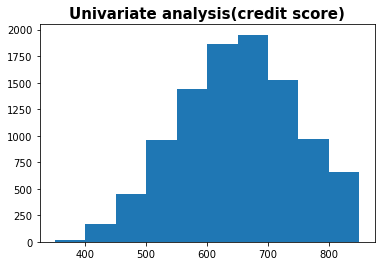

In [12]:
#3a-univariate analysis

plt.title("Univariate analysis(credit score)", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.hist(df.CreditScore)

<AxesSubplot:title={'center':'Bivariate analysis'}, xlabel='Geography', ylabel='count'>

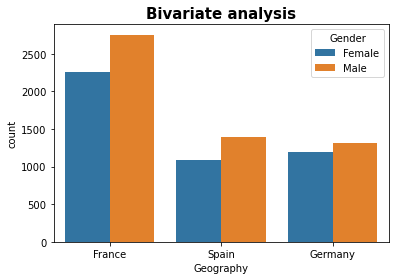

In [13]:
#3b-bivariate analysis
plt.title("Bivariate analysis", fontsize=15, fontweight='bold', ha='center')
sns.countplot(x = "Geography", hue = 'Gender', data = df)

Multivariate Analysis


<AxesSubplot:>

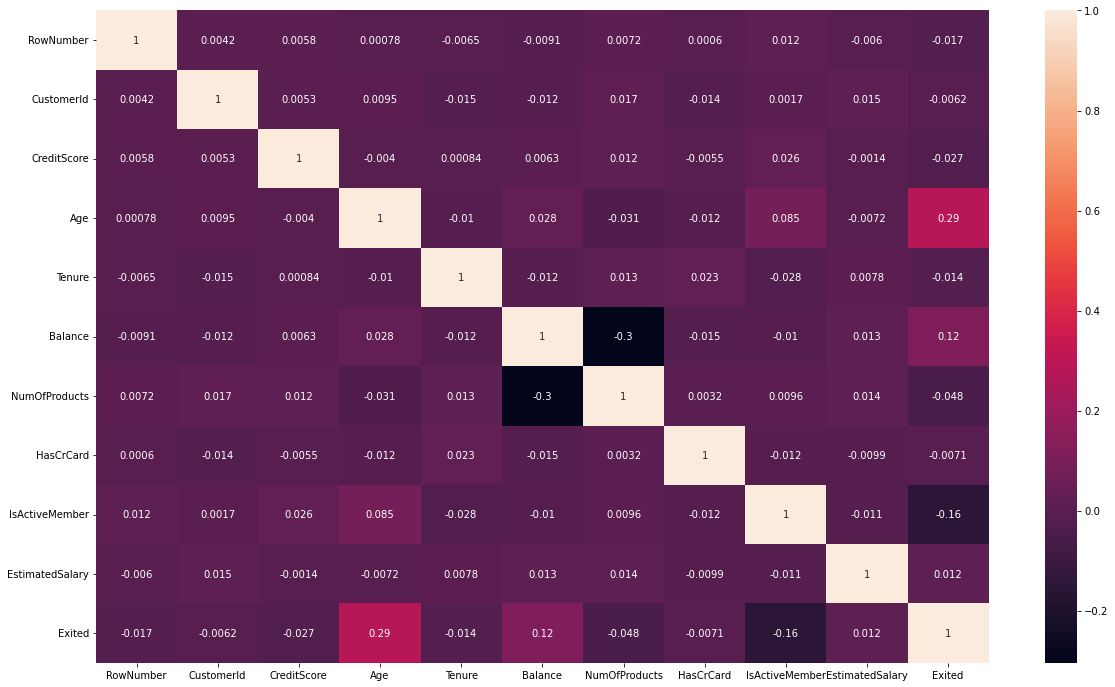

In [14]:
#3c-multivariate analysis
print("Multivariate Analysis")
corr = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr, annot = True)

In [15]:
#4-descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
#5-handling missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

C:\Users\gayathri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

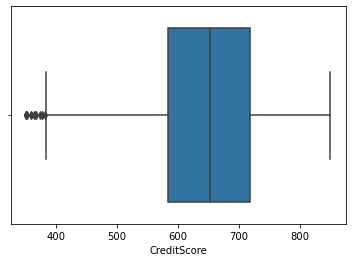

In [20]:
#6-handling outliers
#finding outliers
sns.boxplot(df.CreditScore)

In [21]:
 print(df['CreditScore'].quantile(0.10))
print(df['CreditScore'].quantile(0.90))

521.0
778.0


In [22]:
#handling outliers
df["CreditScore"] = np.where(df["CreditScore"] <0.0, 0.0,df['CreditScore'])
df["CreditScore"] = np.where(df["CreditScore"] > 149244.79200000002, 149244.79200000002,df['Balance'])
print(df['CreditScore'].skew())

-0.14110871094154384


C:\Users\gayathri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

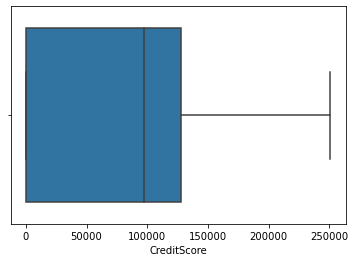

In [23]:
sns.boxplot(df.CreditScore)

In [24]:
#7-encoding categorical columns
from sklearn import preprocessing
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,0.00,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,83807.86,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,159660.80,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,0.00,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,125510.82,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
#8-splitting dataset into dependent and independent variables
columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']
columns = [c for c in columns if c not in ['Exited']]
y = df['Exited'] 
X = df[columns]  

In [27]:
#9-scaling independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [28]:
#10-splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state = 1) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [29]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
2694,113146.98,1,1,29,3,113146.98,2,0,124749.08
5140,105767.28,0,0,29,4,105767.28,2,0,41104.82
2568,130024.87,1,0,47,6,130024.87,1,1,45750.21
3671,111739.40,1,0,52,6,111739.40,2,0,68367.18
7427,122017.19,2,1,33,8,122017.19,1,0,162515.17
...,...,...,...,...,...,...,...,...,...
2895,107363.29,1,1,47,7,107363.29,1,1,66799.28
7813,81245.79,1,0,63,3,81245.79,1,1,69643.31
905,0.00,0,0,45,9,0.00,1,1,92027.69
5192,0.00,0,0,39,8,0.00,2,1,101168.90


In [30]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
9953,0.00,0,1,47,2,0.00,2,1,97057.28
3850,143292.95,0,1,34,3,143292.95,1,1,66526.01
4962,0.00,0,0,42,2,0.00,2,0,90537.47
3886,147833.30,1,1,34,8,147833.30,2,0,1561.58
5437,73481.05,1,1,30,6,73481.05,1,1,176692.65
...,...,...,...,...,...,...,...,...,...
3919,0.00,2,0,39,7,0.00,2,1,19458.75
162,108007.36,0,0,49,7,108007.36,1,0,47125.11
7903,0.00,2,1,34,10,0.00,2,0,161571.79
2242,101014.08,1,0,30,2,101014.08,2,1,165257.31


In [31]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [32]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64